In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas
pandas.set_option('display.max_colwidth',1000)

In [2]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [3]:
VANIDL_DIR="/g/g92/haridev/project/vanidl/src"
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

import vanidl
print(vanidl.__file__)

/g/g92/haridev/project/vanidl/src/vanidl/__init__.py


In [4]:
from vanidl.analyzer import VaniDL
profile = VaniDL()

In [5]:
os.environ["DARSHAN_DIR"] = "/p/gpfs1/haridev/software/spack/opt/spack/linux-rhel7-power9le/gcc-8.3.1/darshan-util-3.3.1-fifnuowfowuyjecyqzpzs62tz5rzjc7l"

In [6]:
#!rm /tmp/temp_analysis/cosmoflow_32*
#!rm /tmp/temp_analysis/cosmoflow_32_io_df.csv

In [7]:
DATAPATH_INCLUDES = ['/p/gpfs1/brainusr/datasets']
status = profile.Load("/g/g92/haridev/project/taxonomy/analysis/logs/lbann/cosmoflow_32.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

[============================================================] 100.0% 4591646 of 4591646 Parsing DXT File 
[============================================================] 100.0% 20148621 of 20148621 Parsing Darshan File 
Darshan Trace loaded Successfully!


In [8]:
df = profile.GetDXTAsDF()

In [9]:
df['Filename'].unique()

[/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a10000668_0_0_0_float.hdf5, /p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/val/univ_ics_2019-03_a6981523_0_0_0_float.hdf5, /p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/test/univ_ics_2019-03_a8515541_0_0_0_float.hdf5, /p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a13383679_3_2_0_float.hdf5, /p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a6312225_3_1_0_float.hdf5, ..., /p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a15079586_0_3_0_float.hdf5, /p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a2092218_3_2_

In [10]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} MB".format(float(summary['total_io_bytes'])/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	13046.00 seconds
Time spent in I/O		:	160.75 seconds
% Time spent in I/O		:	1.23%
Total Data Accessed		:	294293.94 MB
Data Access Modules used	:	['X_POSIX' 'X_MPIIO']
Data Operations			:	['read']
# of files used			:	31203
# of MPI Ranks			:	128 ranks
Data Transfer size:
	Min,Max			:	8 bytes and 2097152 bytes
	Average			:	762077 bytes
	Median			:	512 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	30 B/s and 20000 MB/s
	Average			:	1404 MB/s
	Median			:	1 MB/s
Access Pattern:
	Sequential		:	69.83%
	Consecutive		:	0.21%


Files Summary:
File Types			:	['hdf5']
Dataset Size:
	Total			:	1020.156 GB
	Min,Max			:	0.031 GB and 0.031 GB
	Average			:	0.031 GB


In [11]:
summary

{'type': 'full',
 'job_time': 13046.0,
 'total_io_time': 160.74782656479408,
 'total_io_bytes': 308589564216,
 'io_interface_used': array(['X_POSIX', 'X_MPIIO'], dtype=object),
 'io_operations_used': array(['read'], dtype=object),
 'files_used': ['/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a10000668_0_0_0_float.hdf5',
  '/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/val/univ_ics_2019-03_a6981523_0_0_0_float.hdf5',
  '/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/test/univ_ics_2019-03_a8515541_0_0_0_float.hdf5',
  '/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a13383679_3_2_0_float.hdf5',
  '/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a6312225_3_1_0_float.hdf5',
  '/p/gpfs1/brai

In [12]:
df

,Module,Filename,Rank,Operation,Segment,Offset,Length,Start,End,io_time,bandwidth,ext
3,X_POSIX,/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a10000668_0_0_0_float.hdf5,0,read,0,0,8,1583.11,1583.18,0.0733,109.141,hdf5
4,X_POSIX,/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a10000668_0_0_0_float.hdf5,0,read,1,0,16,1583.18,1583.18,0.0001,160000,hdf5
5,X_POSIX,/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a10000668_0_0_0_float.hdf5,0,read,2,16,80,1583.18,1583.18,0.0001,800000,hdf5
6,X_POSIX,/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a10000668_0_0_0_float.hdf5,0,read,3,96,512,1583.18,1583.18,0.001,512000,hdf5
7,X_POSIX,/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a10000668_0_0_0_float.hdf5,0,read,4,680,512,1583.18,1583.18,0.001,512000,hdf5
...,...,...,...,...,...,...,...,...,...,...,...,...
3091635,X_MPIIO,/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a5776542_3_2_2_float.hdf5,127,read,5,-1,2097152,1953.09,1953.09,0.0002,1.04858e+10,hdf5
3091636,X_MPIIO,/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a5776542_3_2_2_float.hdf5,127,read,6,-1,2097152,1953.09,1953.09,0.0004,5.24288e+09,hdf5
3091637,X_MPIIO,/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a5776542_3_2_2_float.hdf5,127,read,7,-1,2097152,1953.09,1953.09,0.0008,2.62144e+09,hdf5
3091638,X_MPIIO,/p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a5776542_3_2_2_float.hdf5,127,read,8,-1,512,1953.09,1953.09,0.001,512000,hdf5


In [13]:
for rank in df['Rank'].unique()[:16]:
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 17382.30 MB
I/O performed by rank 1: 17381.03 MB
I/O performed by rank 2: 17381.03 MB
I/O performed by rank 3: 17381.03 MB
I/O performed by rank 4: 17358.30 MB
I/O performed by rank 5: 17357.02 MB
I/O performed by rank 6: 17357.02 MB
I/O performed by rank 7: 17357.02 MB
I/O performed by rank 8: 17934.50 MB
I/O performed by rank 9: 17933.19 MB
I/O performed by rank 10: 17933.19 MB
I/O performed by rank 11: 17933.19 MB
I/O performed by rank 12: 17502.35 MB
I/O performed by rank 13: 17501.06 MB
I/O performed by rank 14: 17501.06 MB
I/O performed by rank 15: 17501.06 MB


In [14]:
for file in df['Filename'].unique()[:16]:
    size = float(profile.GetIOSize(filepath=file))/1024.0/1024.0
    if size > 8:
        print("I/O performed on file {}: {:0.2f} MB".format(file,size))

I/O performed on file /p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a10000668_0_0_0_float.hdf5: 160.36 MB
I/O performed on file /p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/val/univ_ics_2019-03_a6981523_0_0_0_float.hdf5: 160.36 MB
I/O performed on file /p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/test/univ_ics_2019-03_a8515541_0_0_0_float.hdf5: 32.32 MB
I/O performed on file /p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a13383679_3_2_0_float.hdf5: 8.00 MB
I/O performed on file /p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ_ics_2019-03_a6312225_3_1_0_float.hdf5: 8.00 MB
I/O performed on file /p/gpfs1/brainusr/datasets/cosmoflow/cosmoUniverse_2019_05_4parE/hdf5_transposed_dim128_float/train/univ

In [15]:
profile.GetFileSizes()

{'univ_ics_2019-03_a6167683_3_0_3_float': 33556496.0,
 'univ_ics_2019-03_a15954965_0_3_3_float': 33556496.0,
 'univ_ics_2019-03_a12535394_3_2_0_float': 33556496.0,
 'univ_ics_2019-03_a5203893_1_1_0_float': 33556496.0,
 'univ_ics_2019-03_a15575936_0_0_2_float': 33556496.0,
 'univ_ics_2019-03_a10359300_1_2_3_float': 33556496.0,
 'univ_ics_2019-03_a4180877_3_2_1_float': 33556496.0,
 'univ_ics_2019-03_a10806786_3_0_3_float': 33556496.0,
 'univ_ics_2019-03_a15331878_3_2_1_float': 33556496.0,
 'univ_ics_2019-03_a16412510_0_0_2_float': 33556496.0,
 'univ_ics_2019-03_a16231006_3_1_0_float': 33556496.0,
 'univ_ics_2019-03_a2787724_1_2_0_float': 33556496.0,
 'univ_ics_2019-03_a5740298_0_2_2_float': 33556496.0,
 'univ_ics_2019-03_a15196212_3_1_0_float': 33556496.0,
 'univ_ics_2019-03_a11751445_1_2_0_float': 33556496.0,
 'univ_ics_2019-03_a15615050_3_3_0_float': 33556496.0,
 'univ_ics_2019-03_a10467969_2_3_2_float': 33556496.0,
 'univ_ics_2019-03_a5988025_1_1_3_float': 33556496.0,
 'univ_ics_2019-

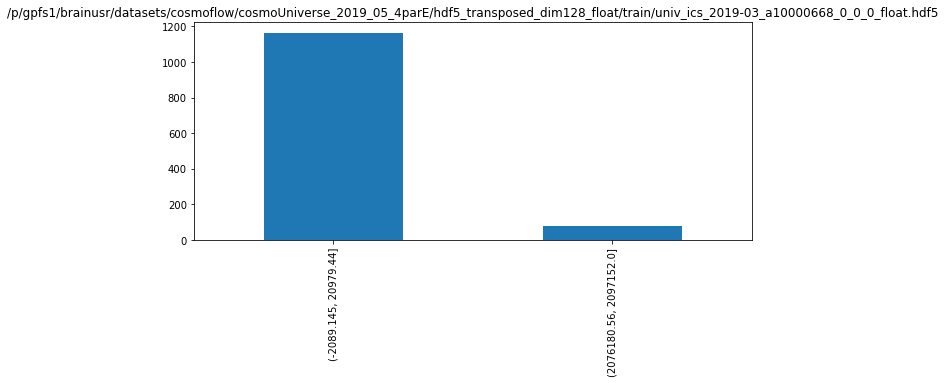

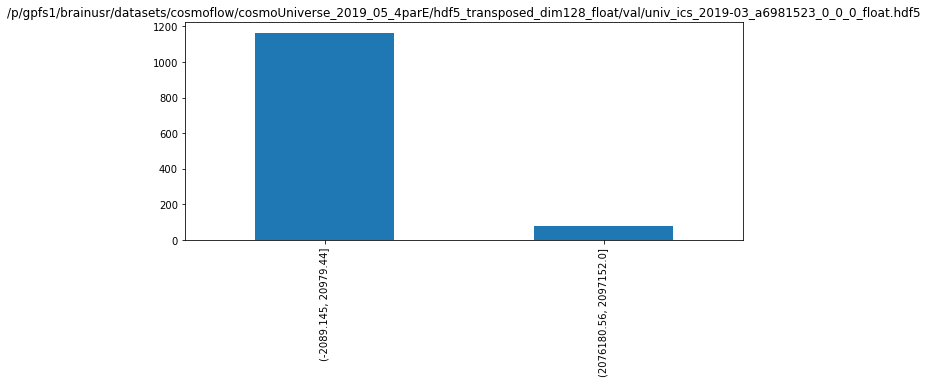

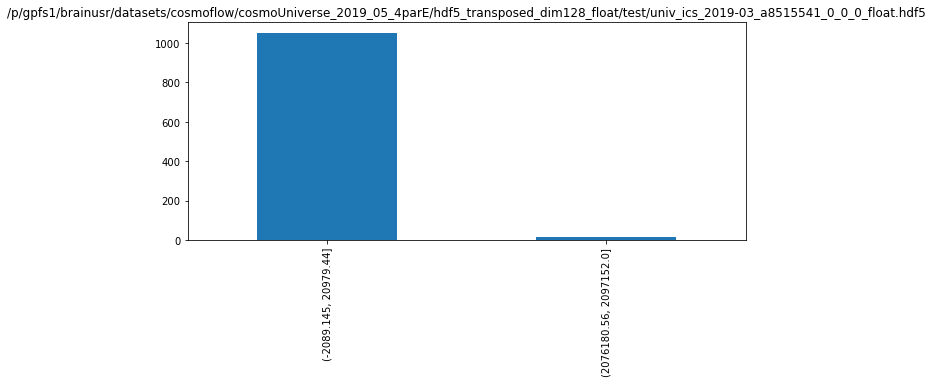

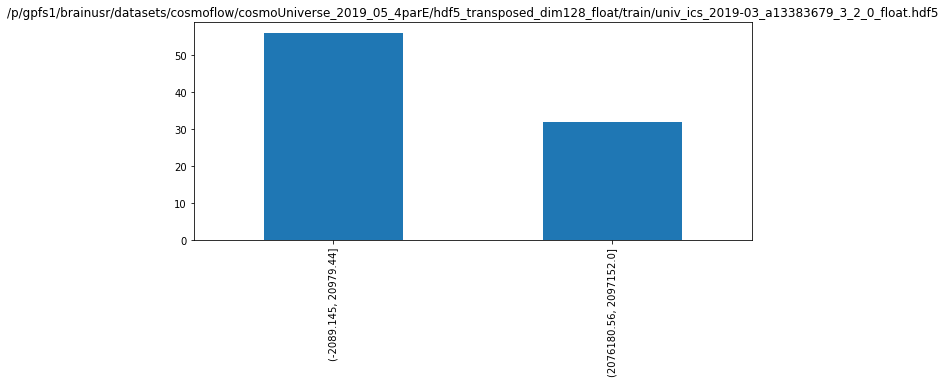

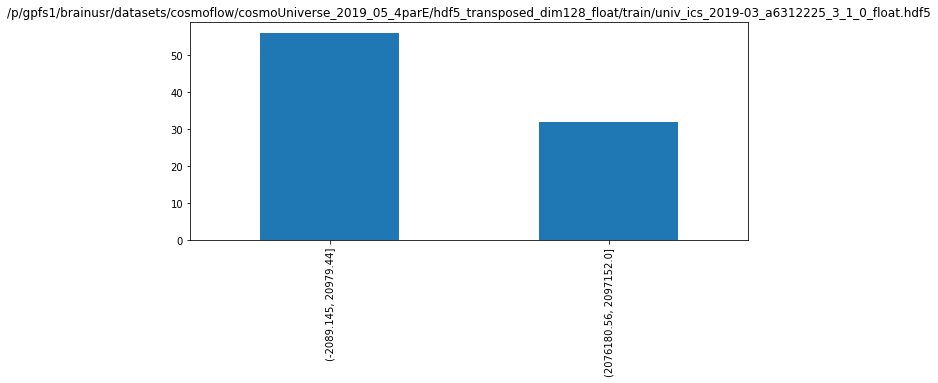

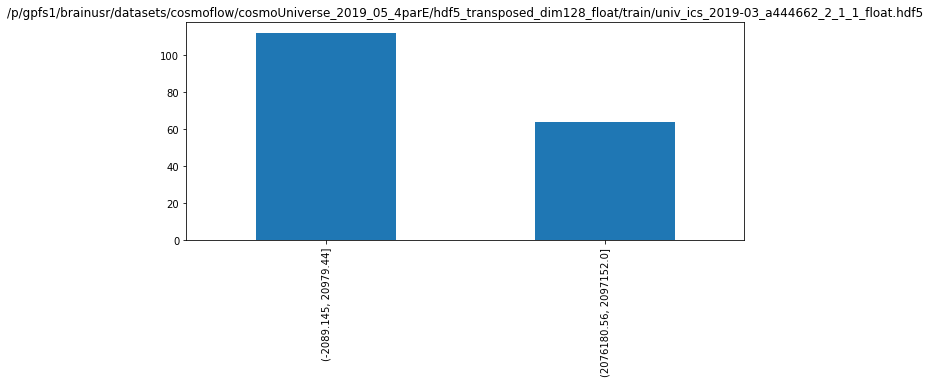

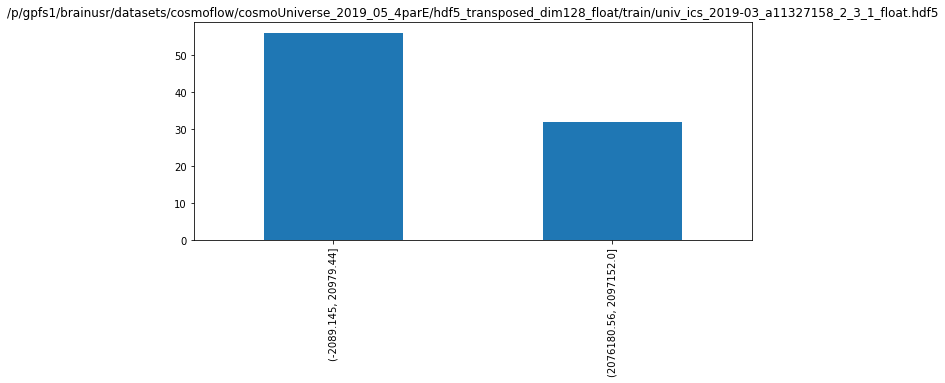

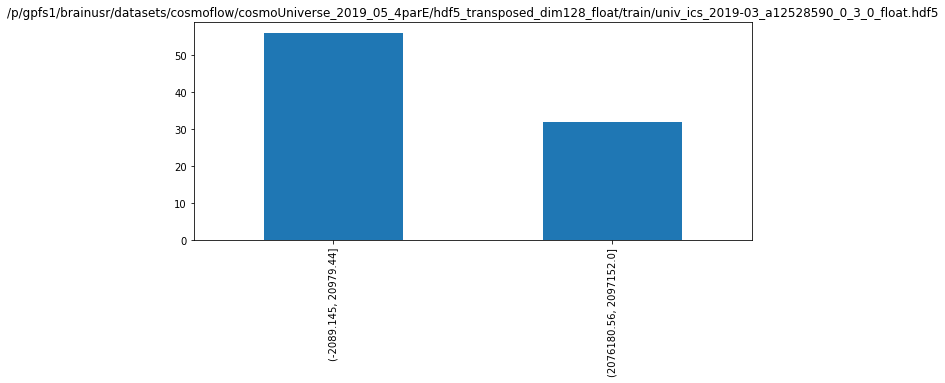

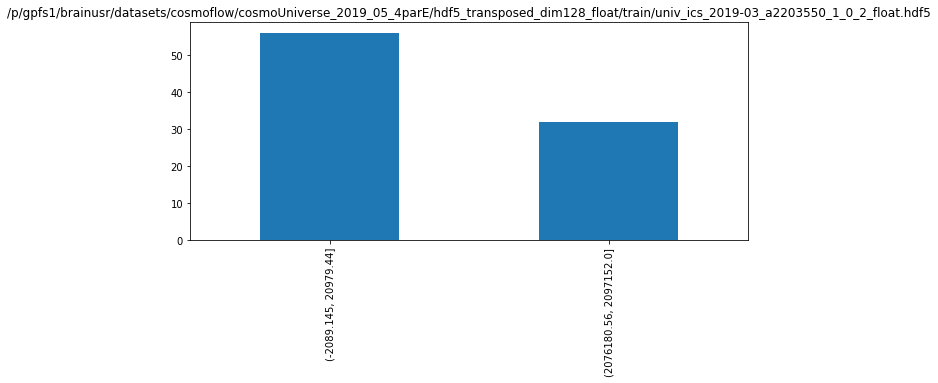

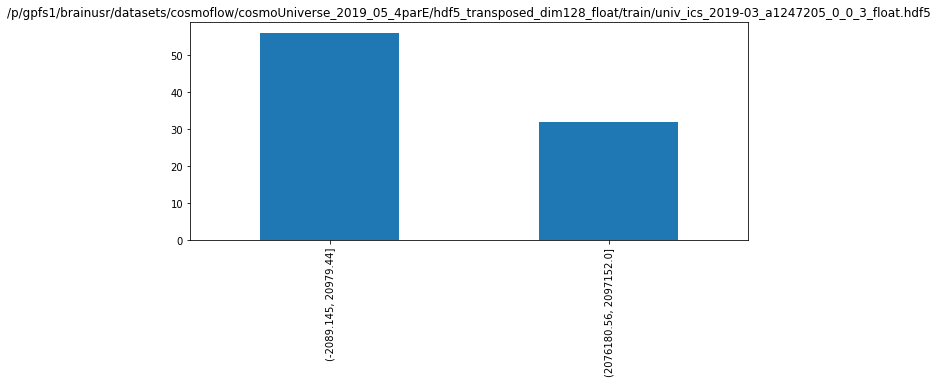

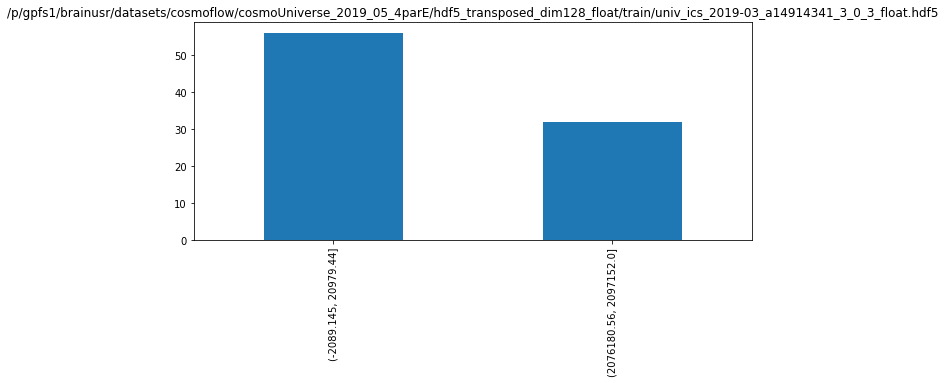

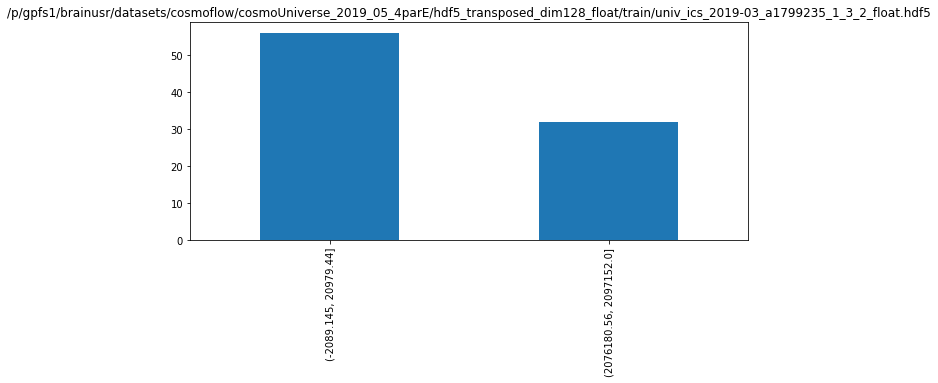

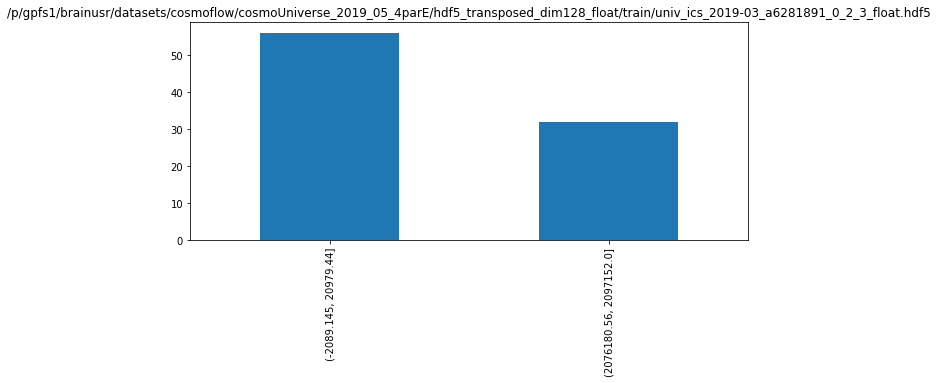

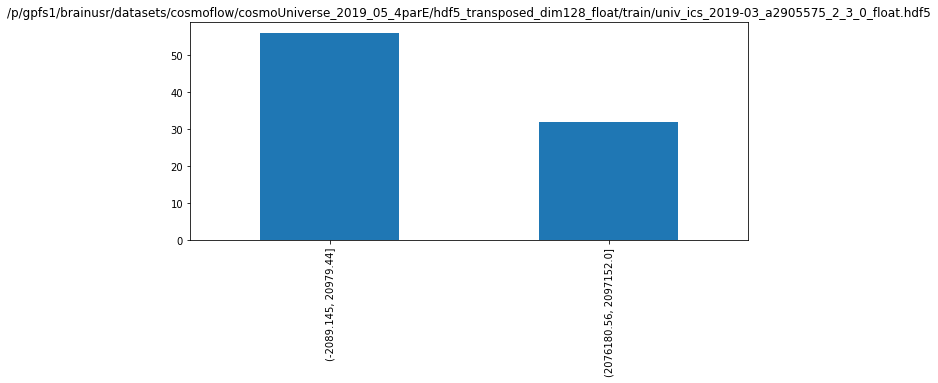

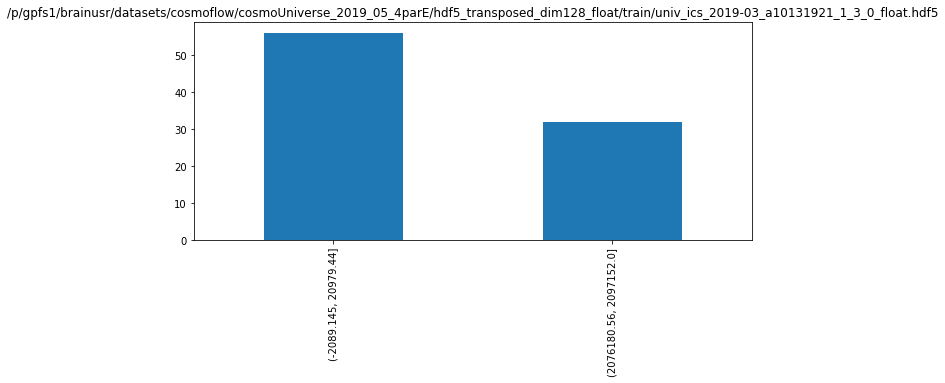

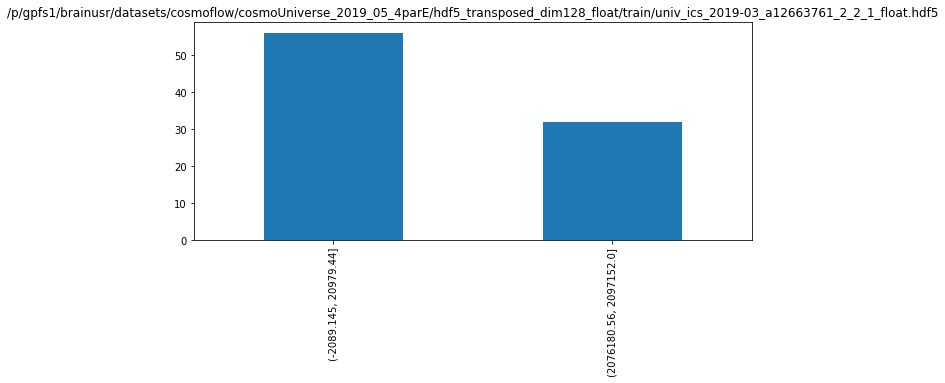

In [16]:
for file in df['Filename'].unique()[:16]:
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)
    plt.show()

[============================================================] 100.0% 3091256 of 3091256 Creating Timeline 


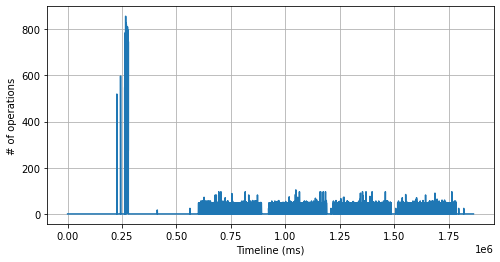

In [17]:
tl = profile.CreateIOTimeline()
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("# of operations")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['operation_count']);

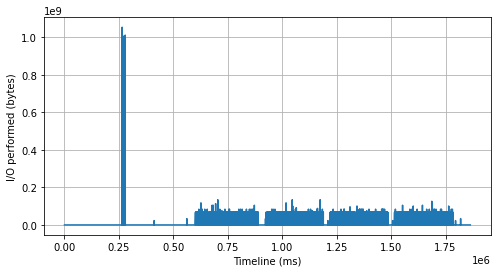

In [18]:
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("I/O performed (bytes)")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['io_bytes']);